# Credit Card Fraud Detection - Artificial Neural Network and SMOTE Sampling

## Import Libraries

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Read and Explore Data

In [5]:
df = pd.read_csv("../data/creditcard.csv")

In [6]:
# First 5 rows of data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Normalize 'Amount'

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
df['Amount(Normalized)'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))

In [11]:
df.iloc[:,[29,31]].head()

,Amount,Amount(Normalized)
0,149.62,0.244964
1,2.69,-0.342475
2,378.66,1.160686
3,123.50,0.140534
4,69.99,-0.073403


In [12]:
df = df.drop(columns = ['Amount', 'Time'], axis=1) # This columns are not necessary anymore.

## Data PreProcessing

In [13]:
X = df.drop('Class', axis=1)

y = df['Class']

## Train-Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# We are transforming data to numpy array to implementing with keras
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Artificial Neural Networks

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout 

In [18]:
model = Sequential([
    Dense(units=20, input_dim = X_train.shape[1], activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(units=20,activation='relu'),
    Dense(units=24,activation='relu'),
    Dense(1, activation='sigmoid')
])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │           504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │           504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,133 (8.33 KB)

 Trainable params: 2,133 (8.33 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=30, epochs=5)

Epoch 1/5


6646/6646 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9960 - loss: 0.0339
Epoch 2/5
6646/6646 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9993 - loss: 0.0038
Epoch 3/5
6646/6646 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9994 - loss: 0.0035
Epoch 4/5
6646/6646 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9994 - loss: 0.0033
Epoch 5/5
6646/6646 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9995 - loss: 0.0026


In [21]:
score = model.evaluate(X_test, y_test)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(score[1]*100,score[0]))

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9994 - loss: 0.0037
Test Accuracy: 99.94%
Test Loss: 0.00340496888384223


In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [24]:
cm = confusion_matrix(y_test, y_pred.round())

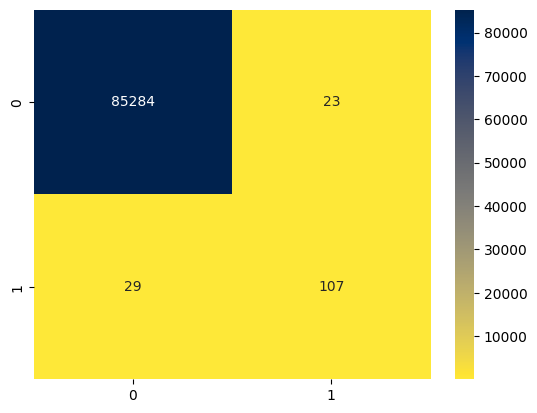

In [25]:
sns.heatmap(cm, annot=True, fmt='.0f', cmap='cividis_r')
plt.show()

Our results is fine however it is not the best way to do things like that. Since our dataset is unbalanced (we have 492 frauds out of 284,807 transactions) we will use 'smote sampling'. Basically smote turn our inbalanced data to balanced data.
For brief explanation you can check the link: http://rikunert.com/SMOTE_explained

## SMOTE Sampling

SMOTE (Synthetic Minority Over-sampling Technique) is a popular oversampling method used to balance datasets with class imbalance. It works by creating synthetic samples of the minority class by interpolating between existing minority class samples. This approach helps to increase the size of the minority class, making the dataset more balanced and improving the performance of machine learning models.


In [26]:
from imblearn.over_sampling import SMOTE

In [29]:
X_smote, y_smote = SMOTE().fit_resample(X, y)

In [30]:
X_smote = pd.DataFrame(X_smote)
y_smote = pd.DataFrame(y_smote)

In [31]:
y_smote.iloc[:,0].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)

In [33]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size = 30, epochs = 5)

Epoch 1/5
13269/13269 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9788 - loss: 0.0540
Epoch 2/5
13269/13269 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9972 - loss: 0.0104
Epoch 3/5
13269/13269 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9980 - loss: 0.0083
Epoch 4/5
13269/13269 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9981 - loss: 0.0077
Epoch 5/5
13269/13269 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9985 - loss: 0.0062


In [64]:
score = model.evaluate(X_test, y_test)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(score[1]*100,score[0]))

170589/170589 [==============================] - 5s 30us/step
Test Accuracy: 99.76%
Test Loss: 0.009045598387554149


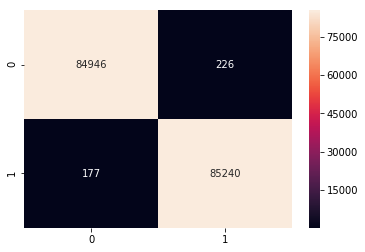

In [65]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

It is not the true result 'cause we used data with smote sampling because of that number of class 0 and class 1 are equal in here. That's why we'll use whole data we imported at the beginning.

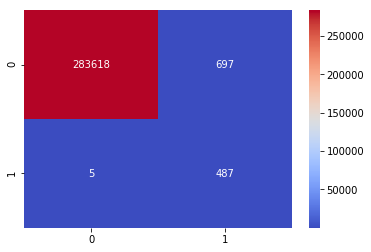

In [67]:
y_pred2 = model.predict(X)
y_test2 = pd.DataFrame(y)
cm2 = confusion_matrix(y_test2, y_pred2.round())
sns.heatmap(cm2, annot=True, fmt='.0f', cmap='coolwarm')
plt.show()

In [76]:
scoreNew = model.evaluate(X, y)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(scoreNew[1]*100,scoreNew[0]))

284807/284807 [==============================] - 9s 32us/step
Test Accuracy: 99.75%
Test Loss: 0.010284884318468747


In [72]:
print(classification_report(y_test2, y_pred2.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.41      0.99      0.58       492

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.71      0.99      0.79    284807
weighted avg       1.00      1.00      1.00    284807

